In [2]:
import numpy as np

def inverse_kinematics_rrr_wrist(x, y, z, d1=10, a2=15, a3=10):
    # Paso 1: √Ångulo base Œ∏1
    theta1 = np.arctan2(y, x)

    # Paso 2: Coordenadas del plano del brazo
    r = np.sqrt(x**2 + y**2)
    s = z - d1

    # Paso 3: Ley del coseno para Œ∏3
    D = (r**2 + s**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if np.abs(D) > 1:
        raise ValueError("Posici√≥n fuera del alcance del robot.")

    theta3 = np.arccos(D)

    # Paso 4: Calcular Œ∏2
    phi = np.arctan2(s, r)
    beta = np.arctan2(a3 * np.sin(theta3), a2 + a3 * np.cos(theta3))
    theta2 = phi - beta

    # Para simplificar: supondremos que la mu√±eca apunta hacia abajo (orientaci√≥n fija)
    # Esto implica que la mu√±eca corrige la orientaci√≥n, as√≠ que damos valores arbitrarios v√°lidos
    theta4 = 0
    theta5 = np.pi / 2
    theta6 = 0

    # Convertimos a grados
    return {
        "theta1 (deg)": np.degrees(theta1),
        "theta2 (deg)": np.degrees(theta2),
        "theta3 (deg)": np.degrees(theta3),
        "theta4 (deg)": np.degrees(theta4),
        "theta5 (deg)": np.degrees(theta5),
        "theta6 (deg)": np.degrees(theta6),
    }

# ============================
# üëá Entrada del usuario
# ============================
if __name__ == "__main__":
    print("Ingrese las coordenadas deseadas del efector final:")
    x = float(input("x (cm): "))
    y = float(input("y (cm): "))
    z = float(input("z (cm): "))

    try:
        angles = inverse_kinematics_rrr_wrist(x, y, z)
        print("\n√Ångulos necesarios (en grados):")
        for joint, angle in angles.items():
            print(f"{joint}: {angle:.2f}")
    except ValueError as e:
        print(f"Error: {e}")


Ingrese las coordenadas deseadas del efector final:
x (cm): 4
y (cm): 6
z (cm): 18

√Ångulos necesarios (en grados):
theta1 (deg): 56.31
theta2 (deg): 6.20
theta3 (deg): 134.16
theta4 (deg): 0.00
theta5 (deg): 90.00
theta6 (deg): 0.00


In [3]:
import numpy as np

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posici√≥n del efector final
    # Plano RRR (tipo codo sin offset)
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    return {"x (cm)": x, "y (cm)": y, "z (cm)": z}

# =============================
# üëá Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los √°ngulos articulares (en grados):")
    t1 = float(input("Œ∏1 (base): "))
    t2 = float(input("Œ∏2 (hombro): "))
    t3 = float(input("Œ∏3 (codo): "))

    position = forward_kinematics(t1, t2, t3)
    print("\nPosici√≥n del efector final:")
    for coord, value in position.items():
        print(f"{coord}: {value:.2f}")


Ingrese los √°ngulos articulares (en grados):
Œ∏1 (base): 56.31
Œ∏2 (hombro): 6.20
Œ∏3 (codo): 134.16

Posici√≥n del efector final:
x (cm): 4.00
y (cm): 6.00
z (cm): 18.00


In [4]:
import numpy as np

# Funci√≥n para calcular la matriz de rotaci√≥n de la mu√±eca (Cinem√°tica inversa)
def wrist_kinematics(R03):
    # Descomponer la matriz de rotaci√≥n en los √°ngulos de Euler (roll, pitch, yaw)
    # Usamos la convenci√≥n ZYX (yaw-pitch-roll) para descomponer la matriz R03
    theta_4 = np.arctan2(R03[1, 2], R03[0, 2])  # √Ångulo de giro de mu√±eca 1
    theta_5 = np.arctan2(-R03[2, 2], np.sqrt(R03[2, 0]**2 + R03[2, 1]**2))  # √Ångulo de inclinaci√≥n mu√±eca
    theta_6 = np.arctan2(R03[2, 1], R03[2, 0])  # √Ångulo de giro de mu√±eca 2

    return theta_4, theta_5, theta_6

# Funci√≥n para calcular la cinem√°tica directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posici√≥n del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Definir la matriz de rotaci√≥n de la mu√±eca (simplemente un ejemplo)
    # Se puede modificar para usar la orientaci√≥n deseada de la herramienta
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# =============================
# üëá Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los √°ngulos articulares del brazo (en grados):")
    t1 = float(input("Œ∏1 (base): "))
    t2 = float(input("Œ∏2 (hombro): "))
    t3 = float(input("Œ∏3 (codo): "))

    # Calcular la posici√≥n y orientaci√≥n
    x, y, z, R03 = forward_kinematics(t1, t2, t3)

    # Mostrar la posici√≥n
    print(f"\nPosici√≥n del efector final: x = {x:.2f}, y = {y:.2f}, z = {z:.2f}")

    # Calcular los √°ngulos de la mu√±eca
    theta_4, theta_5, theta_6 = wrist_kinematics(R03)

    # Mostrar los √°ngulos de la mu√±eca
    print(f"\n√Ångulos de la mu√±eca (Œ∏4, Œ∏5, Œ∏6) en radianes:")
    print(f"Œ∏4 (giro mu√±eca 1): {theta_4:.2f} rad")
    print(f"Œ∏5 (inclinaci√≥n mu√±eca): {theta_5:.2f} rad")
    print(f"Œ∏6 (giro mu√±eca 2): {theta_6:.2f} rad")


Ingrese los √°ngulos articulares del brazo (en grados):
Œ∏1 (base): 56.31
Œ∏2 (hombro): 6.20
Œ∏3 (codo): 134.16

Posici√≥n del efector final: x = 4.00, y = 6.00, z = 18.00

√Ångulos de la mu√±eca (Œ∏4, Œ∏5, Œ∏6) en radianes:
Œ∏4 (giro mu√±eca 1): 0.98 rad
Œ∏5 (inclinaci√≥n mu√±eca): 0.88 rad
Œ∏6 (giro mu√±eca 2): 0.00 rad


In [5]:
import numpy as np

# Funci√≥n para convertir √°ngulos de Euler a una matriz de rotaci√≥n 3x3
def euler_to_rotation_matrix(roll, pitch, yaw):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])

    R_y = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])

    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    # La matriz de rotaci√≥n total es la multiplicaci√≥n de las tres matrices
    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

# Funci√≥n para calcular la cinem√°tica directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posici√≥n del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Generar la matriz de rotaci√≥n de la mu√±eca (orientaci√≥n fija para simplificaci√≥n)
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# Funci√≥n para calcular la cinem√°tica de la mu√±eca (descomponer la matriz de rotaci√≥n)
def wrist_kinematics(R03):
    # Descomponer la matriz de rotaci√≥n en los √°ngulos de Euler (roll, pitch, yaw)
    theta_4 = np.arctan2(R03[1, 2], R03[0, 2])  # √Ångulo de giro de mu√±eca 1
    theta_5 = np.arctan2(-R03[2, 2], np.sqrt(R03[2, 0]**2 + R03[2, 1]**2))  # √Ångulo de inclinaci√≥n mu√±eca
    theta_6 = np.arctan2(R03[2, 1], R03[2, 0])  # √Ångulo de giro de mu√±eca 2

    return theta_4, theta_5, theta_6

# =============================
# üëá Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los √°ngulos articulares del brazo (en grados):")
    t1 = float(input("Œ∏1 (base): "))
    t2 = float(input("Œ∏2 (hombro): "))
    t3 = float(input("Œ∏3 (codo): "))

    # Ingresar la orientaci√≥n deseada (√°ngulos de Euler: roll, pitch, yaw)
    print("\nIngrese los √°ngulos de Euler para la orientaci√≥n deseada del efector final (en grados):")
    roll = np.radians(float(input("Roll (alrededor del eje X): ")))   # √Ångulo de rotaci√≥n alrededor del eje X
    pitch = np.radians(float(input("Pitch (alrededor del eje Y): "))) # √Ångulo de rotaci√≥n alrededor del eje Y
    yaw = np.radians(float(input("Yaw (alrededor del eje Z): ")))     # √Ångulo de rotaci√≥n alrededor del eje Z

    # Convertir √°ngulos de Euler a matriz de rotaci√≥n
    R_desired = euler_to_rotation_matrix(roll, pitch, yaw)

    # Calcular la posici√≥n y orientaci√≥n del efector final
    x, y, z, R03 = forward_kinematics(t1, t2, t3)

    # Mostrar la posici√≥n
    print(f"\nPosici√≥n del efector final: x = {x:.2f}, y = {y:.2f}, z = {z:.2f}")

    # Mostrar la matriz de rotaci√≥n resultante
    print("\nMatriz de rotaci√≥n de la mu√±eca (R03):")
    print(R03)

    # Calcular los √°ngulos de la mu√±eca
    theta_4, theta_5, theta_6 = wrist_kinematics(R03)

    # Mostrar los √°ngulos de la mu√±eca
    print(f"\n√Ångulos de la mu√±eca (Œ∏4, Œ∏5, Œ∏6) en radianes:")
    print(f"Œ∏4 (giro mu√±eca 1): {theta_4:.2f} rad")
    print(f"Œ∏5 (inclinaci√≥n mu√±eca): {theta_5:.2f} rad")
    print(f"Œ∏6 (giro mu√±eca 2): {theta_6:.2f} rad")

    # Mostrar la orientaci√≥n deseada (en radianes)
    print("\nOrientaci√≥n deseada (en radianes):")
    print(f"Roll: {roll:.2f}, Pitch: {pitch:.2f}, Yaw: {yaw:.2f}")


Ingrese los √°ngulos articulares del brazo (en grados):
Œ∏1 (base): 45
Œ∏2 (hombro): 60
Œ∏3 (codo): 90

Ingrese los √°ngulos de Euler para la orientaci√≥n deseada del efector final (en grados):
Roll (alrededor del eje X): 4
Pitch (alrededor del eje Y): 7
Yaw (alrededor del eje Z): 8

Posici√≥n del efector final: x = -0.82, y = -0.82, z = 27.99

Matriz de rotaci√≥n de la mu√±eca (R03):
[[-0.61237244 -0.70710678  0.35355339]
 [-0.61237244  0.70710678  0.35355339]
 [ 0.5         0.         -0.8660254 ]]

√Ångulos de la mu√±eca (Œ∏4, Œ∏5, Œ∏6) en radianes:
Œ∏4 (giro mu√±eca 1): 0.79 rad
Œ∏5 (inclinaci√≥n mu√±eca): 1.05 rad
Œ∏6 (giro mu√±eca 2): 0.00 rad

Orientaci√≥n deseada (en radianes):
Roll: 0.07, Pitch: 0.12, Yaw: 0.14


In [6]:
import numpy as np

# Funci√≥n para calcular la cinem√°tica directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calculamos la posici√≥n del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Retornamos la posici√≥n (x, y, z) y la matriz de rotaci√≥n de la mu√±eca
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# Funci√≥n para calcular la cinem√°tica inversa del brazo (encontrar los √°ngulos a partir de la posici√≥n)
def inverse_kinematics(x, y, z, d1, a2, a3):
    # Usaremos la posici√≥n (x, y, z) para encontrar los √°ngulos

    # Primero calculamos la distancia en el plano XY
    r = np.sqrt(x**2 + y**2)

    # Usamos la ley de cosenos para encontrar los √°ngulos de las articulaciones
    # Calculamos theta3 (√°ngulo del codo)
    cos_theta3 = (r**2 + z**2 - a2**2 - a3**2) / (2 * a2 * a3)
    theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))  # Aseguramos que el valor est√© en el rango v√°lido

    # Calculamos theta2 (√°ngulo del hombro)
    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z, r) - np.arctan2(k2, k1)

    # Calculamos theta1 (√°ngulo de la base)
    theta1 = np.arctan2(y, x)

    # Convertir los √°ngulos a grados
    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

# ================================
# üëá Entrada del usuario
# ================================
if __name__ == "__main__":
    # Solicitar al usuario las coordenadas cartesianas (x, y, z)
    print("Ingrese las coordenadas cartesianas (x, y, z) del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    # Solicitar al usuario las longitudes de los eslabones (a2, a3) y desplazamiento de base (d1)
    print("\nIngrese los tama√±os de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslab√≥n): "))
    a3 = float(input("a3 (longitud del segundo eslab√≥n): "))

    # Calcular los √°ngulos articulares usando la cinem√°tica inversa
    theta1, theta2, theta3 = inverse_kinematics(x, y, z, d1, a2, a3)

    # Mostrar los √°ngulos obtenidos
    print(f"\n√Ångulos articulares calculados (en grados):")
    print(f"Œ∏1 (base): {theta1:.2f}¬∞")
    print(f"Œ∏2 (hombro): {theta2:.2f}¬∞")
    print(f"Œ∏3 (codo): {theta3:.2f}¬∞")

    # Verificar que los √°ngulos calculados cumplen con las coordenadas ingresadas
    x_calc, y_calc, z_calc, R03 = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)

    print(f"\nPosici√≥n calculada del efector final (x, y, z): x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")
    print(f"\nMatriz de rotaci√≥n (R03) de la mu√±eca:")
    print(R03)


Ingrese las coordenadas cartesianas (x, y, z) del efector final:
x: 4
y: 6
z: 7

Ingrese los tama√±os de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 20
a2 (longitud del primer eslab√≥n): 10
a3 (longitud del segundo eslab√≥n): 10

√Ångulos articulares calculados (en grados):
Œ∏1 (base): 56.31¬∞
Œ∏2 (hombro): -15.69¬∞
Œ∏3 (codo): 119.67¬∞

Posici√≥n calculada del efector final (x, y, z): x = 4.00, y = 6.00, z = 27.00

Matriz de rotaci√≥n (R03) de la mu√±eca:
[[-0.13404215 -0.83205029  0.5382611 ]
 [-0.20106323  0.5547002   0.80739165]
 [ 0.97036399  0.         -0.24164792]]


Ingrese los tama√±os de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslab√≥n): 15
a3 (longitud del segundo eslab√≥n): 15

Ingrese las coordenadas cartesianas (x, y, z) del efector final:
x: 24
y: 35
z: 40

√Ångulos articulares calculados (en grados):
Œ∏1 (base): 55.56¬∞
Œ∏2 (hombro): 13.26¬∞
Œ∏3 (codo): 0.00¬∞

Posici√≥n calculada del efector final: x = 16.51, y = 24.08, z = 36.88


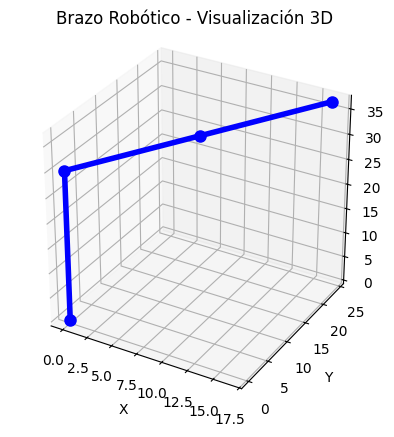

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Funci√≥n para cinem√°tica directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

# Cinem√°tica inversa
def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)
    theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

# Visualizaci√≥n
def plot_robot(positions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]

    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Rob√≥tico - Visualizaci√≥n 3D")
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tama√±os de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslab√≥n): "))
    a3 = float(input("a3 (longitud del segundo eslab√≥n): "))

    print("\nIngrese las coordenadas cartesianas (x, y, z) del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    theta1, theta2, theta3 = inverse_kinematics(x, y, z, d1, a2, a3)

    print(f"\n√Ångulos articulares calculados (en grados):")
    print(f"Œ∏1 (base): {theta1:.2f}¬∞")
    print(f"Œ∏2 (hombro): {theta2:.2f}¬∞")
    print(f"Œ∏3 (codo): {theta3:.2f}¬∞")

    positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
    x_calc, y_calc, z_calc = positions[-1]

    print(f"\nPosici√≥n calculada del efector final: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

    plot_robot(positions)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot del brazo
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo rob√≥tico')

    # Generar esfera hueca de trabajo (espacio entre alcance_min y alcance_max)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Rob√≥tico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tama√±os de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslab√≥n): "))
    a3 = float(input("a3 (longitud del segundo eslab√≥n): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)

    if not (alcance_min <= r <= alcance_max and z_min <= z <= z_max):
        print("\n‚ùå ERROR: La posici√≥n ingresada est√° FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n‚ùå ERROR: La posici√≥n est√° fuera del espacio de trabajo real.")
        else:
            theta1, theta2, theta3 = result
            print(f"\n‚úÖ √Ångulos articulares:")
            print(f"Œ∏1 (base): {theta1:.2f}¬∞")
            print(f"Œ∏2 (hombro): {theta2:.2f}¬∞")
            print(f"Œ∏3 (codo): {theta3:.2f}¬∞")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\nüîç Posici√≥n alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max)


Ingrese los tama√±os de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslab√≥n): 15
a3 (longitud del segundo eslab√≥n): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 24
y: 34
z: 34

‚ùå ERROR: La posici√≥n ingresada est√° FUERA del alcance del brazo.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max, d1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo rob√≥tico')

    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Rob√≥tico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tama√±os de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslab√≥n): "))
    a3 = float(input("a3 (longitud del segundo eslab√≥n): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)
    epsilon = 1e-6  # Tolerancia num√©rica

    if not (alcance_min - epsilon <= r <= alcance_max + epsilon and z_min - epsilon <= z <= z_max + epsilon):
        print("\n‚ùå ERROR: La posici√≥n ingresada est√° FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n‚ùå ERROR: La posici√≥n est√° fuera del espacio de trabajo real (por √°ngulos imposibles).")
        else:
            theta1, theta2, theta3 = result
            print(f"\n‚úÖ √Ångulos articulares:")
            print(f"Œ∏1 (base): {theta1:.2f}¬∞")
            print(f"Œ∏2 (hombro): {theta2:.2f}¬∞")
            print(f"Œ∏3 (codo): {theta3:.2f}¬∞")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\nüîç Posici√≥n alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max, d1)
11

Ingrese los tama√±os de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslab√≥n): 15
a3 (longitud del segundo eslab√≥n): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 30
y: 30
z: 30

‚ùå ERROR: La posici√≥n ingresada est√° FUERA del alcance del brazo.


11

In [13]:
import numpy as np

def calcular_espacio_trabajo(a1, a2, a3):
    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3

    x_min = -alcance_max
    x_max = alcance_max
    y_min = -alcance_max
    y_max = alcance_max
    z_min = -alcance_max
    z_max = alcance_max

    return x_min, x_max, y_min, y_max, z_min, z_max, alcance_min, alcance_max

if __name__ == "__main__":
    print("=== Robot RRR tipo codo (sin offset) ===")
    print("Ingrese las longitudes de los eslabones del robot:")

    a1 = float(input("a1 (base, solo para visualizaci√≥n): "))
    a2 = float(input("a2 (primer eslab√≥n): "))
    a3 = float(input("a3 (segundo eslab√≥n): "))

    x_min, x_max, y_min, y_max, z_min, z_max, r_min, r_max = calcular_espacio_trabajo(a1, a2, a3)

    print("\n=== Espacio de trabajo (rango cartesiano del efector final) ===")
    print(f"Coordenadas X: de {x_min:.2f} a {x_max:.2f}")
    print(f"Coordenadas Y: de {y_min:.2f} a {y_max:.2f}")
    print(f"Coordenadas Z: de {z_min:.2f} a {z_max:.2f}")
    print(f"\nAlcance radial desde el eje central: de {r_min:.2f} a {r_max:.2f}")


=== Robot RRR tipo codo (sin offset) ===
Ingrese las longitudes de los eslabones del robot:
a1 (base, solo para visualizaci√≥n): 30
a2 (primer eslab√≥n): 15
a3 (segundo eslab√≥n): 15

=== Espacio de trabajo (rango cartesiano del efector final) ===
Coordenadas X: de -30.00 a 30.00
Coordenadas Y: de -30.00 a 30.00
Coordenadas Z: de -30.00 a 30.00

Alcance radial desde el eje central: de 0.00 a 30.00


In [18]:
import numpy as np

def calcular_espacio_trabajo(a1, a2, a3):
    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3

    return alcance_min, alcance_max

if __name__ == "__main__":
    print("=== Robot RRR tipo codo (sin offset) ===")
    print("Ingrese las longitudes de los eslabones del robot:")

    a1 = float(input("a1 (base, solo para visualizaci√≥n): "))
    a2 = float(input("a2 (primer eslab√≥n): "))
    a3 = float(input("a3 (segundo eslab√≥n): "))

    alcance_min, alcance_max = calcular_espacio_trabajo(a1, a2, a3)

    print("\n=== Espacio de trabajo (rango cartesiano del efector final) ===")
    print(f"Alcance radial m√≠nimo: {alcance_min:.2f}")
    print(f"Alcance radial m√°ximo: {alcance_max:.2f}")

    # Solicitar coordenadas del efector final
    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    # Calcular la distancia total desde el origen (0, 0, 0)
    distancia = np.sqrt(x**2 + y**2 + z**2)

    if distancia >= alcance_min and distancia <= alcance_max:
        print(f"\n‚úÖ La posici√≥n ({x}, {y}, {z}) est√° dentro del alcance del robot.")
    else:
        print(f"\n‚ùå ERROR: La posici√≥n ({x}, {y}, {z}) est√° fuera  alcance del robot.")


=== Robot RRR tipo codo (sin offset) ===
Ingrese las longitudes de los eslabones del robot:
a1 (base, solo para visualizaci√≥n): 30
a2 (primer eslab√≥n): 15
a3 (segundo eslab√≥n): 15

=== Espacio de trabajo (rango cartesiano del efector final) ===
Alcance radial m√≠nimo: 0.00
Alcance radial m√°ximo: 30.00

Ingrese las coordenadas deseadas del efector final:
x: 30
y: 30
z: 30

‚ùå ERROR: La posici√≥n (30.0, 30.0, 30.0) est√° fuera  alcance del robot.


Ingrese los tama√±os de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslab√≥n): 15
a3 (longitud del segundo eslab√≥n): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 10
y: 12
z: 23

‚úÖ √Ångulos articulares:
Œ∏1 (base): 50.19¬∞
Œ∏2 (hombro): -79.35¬∞
Œ∏3 (codo): 110.42¬∞

üîç Posici√≥n alcanzada: x = 10.00, y = 12.00, z = 23.00


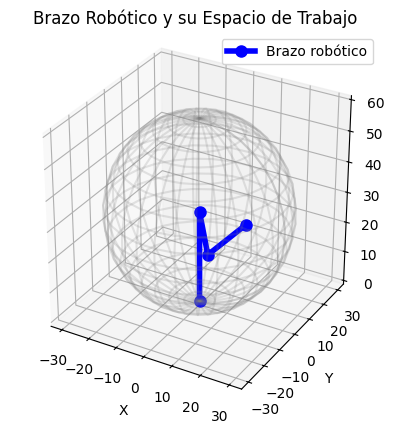

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot del brazo
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo rob√≥tico')

    # Generar esfera hueca de trabajo (espacio entre alcance_min y alcance_max)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Rob√≥tico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tama√±os de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslab√≥n): "))
    a3 = float(input("a3 (longitud del segundo eslab√≥n): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)

    if not (alcance_min <= r <= alcance_max and z_min <= z <= z_max):
        print("\n‚ùå ERROR: La posici√≥n ingresada est√° FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n‚ùå ERROR: La posici√≥n est√° fuera del espacio de trabajo real.")
        else:
            theta1, theta2, theta3 = result
            print(f"\n‚úÖ √Ångulos articulares:")
            print(f"Œ∏1 (base): {theta1:.2f}¬∞")
            print(f"Œ∏2 (hombro): {theta2:.2f}¬∞")
            print(f"Œ∏3 (codo): {theta3:.2f}¬∞")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\nüîç Posici√≥n alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max)
